In [117]:
import numpy as np
import pandas as pd
import pandas_profiling
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [118]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [119]:
train['train or test']='train'
test['train or test']='test'

In [120]:
data=pd.concat([train,test])

In [121]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,train or test
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,train


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
train or test                 783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 83.7+ MB


In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,14
Number of observations,783667
Total Missing (%),9.3%
Total size in memory,83.7 MiB
Average record size in memory,112.0 B
Numeric,7
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [123]:
data.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
train or test                  object
dtype: object

In [124]:
#Converting Categorical Var to object
data['Marital_Status']=data['Marital_Status'].astype('object')
data['Occupation']=data['Occupation'].astype('object')
data['Product_Category_1']=data['Product_Category_1'].astype('object')
data['Product_Category_2']=data['Product_Category_2'].astype('object')
data['Product_Category_3']=data['Product_Category_3'].astype('object')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null object
Occupation                    783667 non-null object
Product_Category_1            783667 non-null object
Product_Category_2            537685 non-null object
Product_Category_3            237858 non-null object
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
train or test                 783667 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 83.7+ MB


###### separating Numeric and Categorical features  -
The main motive behind separating the categorical and numeric data is to apply proper statistical methods because the statistics we apply on numeric data we can not apply it on categorical.By Separating them will help doing analysis more easily. 

In [126]:
cat=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
num=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['int64','float64']]

In [127]:
num_data=data[num]
cat_data=data[cat]

In [128]:
num_data.head()

,Purchase,User_ID
0,8370.0,1000001
1,15200.0,1000001
2,1422.0,1000001
3,1057.0,1000001
4,7969.0,1000002


###### Creating Data audit Report
Below general function will returns statistcal summary on numeric data 

In [129]:
def var_summary(x):
    return pd.Series(data=[x.count(),x.isnull().sum(),x.isnull().sum()/x.shape[0],x.mean(),x.median(),x.var(),x.std(),x.std()/x.mean(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['N','NMiss',"Missing %","Mean","Median","Variance","STD","CV","Min","P1","P5","P10","P25","P50","P75","P90","P95","P99","MAX"])

In [130]:
num_summary=num_data.apply(var_summary).T

In [131]:
num_summary

,N,NMiss,Missing %,Mean,Median,Variance,STD,CV,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Purchase,550068.0,233599.0,0.298085,9.263969e+03,8047.0,2.523119e+07,5023.065394,0.542215,12.0,587.0,1984.0,3540.0,5823.0,8047.0,12054.0,16317.0,19336.0,20665.0,23961.0
User_ID,783667.0,0.0,0.000000,1.003029e+06,1003075.0,2.983450e+06,1727.266668,0.001722,1000001.0,1000068.0,1000328.0,1000670.0,1001519.0,1003075.0,1004478.0,1005446.0,1005747.0,1005980.0,1006040.0


In [132]:
#num_summary.to_csv('num.csv')

In [133]:
def cat_var_summary(x):
    return pd.Series(data=[x.count(),x.isnull().sum(),x.isnull().sum()/x.shape[0],len(x.unique()),x.mode()[0]],
                     index=['N','NMiss','Missing %','Distinct Category','Mode'])

In [134]:
cat_summary=cat_data.apply(cat_var_summary).T

In [135]:
#cat_summary.to_excel('cat_var_swummary.xlsx')

In [136]:
cat_data.Gender.mode()[0]

'M'

##### Product_Category_2(31% of missings) and Product_Category_3(70% of missings) have more than 30 % of missings values we can drop them 

In [137]:
cat_data=cat_data.drop(['Product_Category_2','Product_Category_3'],axis=1)

###### Age is an ordinal vriable we can lebel them bucketwise as 
bucket 0-17 as 1

bucket 18-25 as 2

bucket 26-35 as 3

bucket 36-45 as 4

bucket 46-50 as 5

bucket 51-55 as 6

bucket 55+ as 7

In [138]:
cat_data['Age']=np.where(cat_data['Age']=='0-17',1,
                        np.where(cat_data['Age']=='18-25',2,
                                np.where(cat_data['Age']=='26-35',3,
                                        np.where(cat_data['Age']=='36-45',4,
                                                 np.where(cat_data['Age']=='46-50',5,
                                                         np.where(cat_data['Age']=='51-55',6,
                                                                 np.where(cat_data['Age']=='55+',7,'NA')))))))

In [139]:
cat_data.Age.unique()

array(['1', '7', '3', '5', '6', '4', '2'], dtype=object)

###### Stay_In_Current_City_Years is oridal feature we can lebal them as 0,1,2,3,4

In [140]:
cat_data['Stay_In_Current_City_Years']=cat_data['Stay_In_Current_City_Years'].replace('4+',4)

In [141]:
cat_data.Stay_In_Current_City_Years.unique()

array(['2', 4, '3', '1', '0'], dtype=object)

##### Gender is an binary feature we can ither create a dummy or lebal them as 0 and 1

In [142]:
cat_data['Gender']=cat_data['Gender'].replace('F',0)
cat_data['Gender']=cat_data['Gender'].replace('M',1)

In [143]:
cat_data.Gender.unique()

array([0, 1], dtype=int64)

###### Marital_Status alrady labeled as 0 and 1
###### City_Category,Occupation and Product_Category_1 are nominal in nature we can convert them into dummy variables 

In [144]:
def get_dummies(df,colnames):
    dummies_df=pd.get_dummies(df[colnames],prefix=colnames) #get dummie
    dummies_df=dummies_df.drop(dummies_df.columns[0],axis=1) #removing 1st col to avoid multicolinarity
    df=pd.concat([df,dummies_df],axis=1) #concating with df
    df=df.drop(colnames,axis=1) #removing original column 
    return df    #returning df

In [145]:
cat_data.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_ID', 'Stay_In_Current_City_Years',
       'train or test'],
      dtype='object')

In [146]:
for feature in ['City_Category','Occupation','Product_Category_1']:
    cat_data[feature]=cat_data[feature].astype('category')
    cat_data=get_dummies(cat_data,feature)

In [147]:
cat_data.head()

,Age,Gender,Marital_Status,Product_ID,Stay_In_Current_City_Years,train or test,City_Category_B,City_Category_C,Occupation_1,Occupation_2,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,1,0,0,P00069042,2,train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,P00248942,2,train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,P00087842,2,train,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,P00085442,2,train,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7,1,0,P00285442,4,train,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 47 columns):
Age                           783667 non-null object
Gender                        783667 non-null int64
Marital_Status                783667 non-null object
Product_ID                    783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
train or test                 783667 non-null object
City_Category_B               783667 non-null uint8
City_Category_C               783667 non-null uint8
Occupation_1                  783667 non-null uint8
Occupation_2                  783667 non-null uint8
Occupation_3                  783667 non-null uint8
Occupation_4                  783667 non-null uint8
Occupation_5                  783667 non-null uint8
Occupation_6                  783667 non-null uint8
Occupation_7                  783667 non-null uint8
Occupation_8                  783667 non-null uint8
Occupation_9                  783667 non-null uint8


In [149]:

cat_data[[key for key in dict(cat_data.dtypes) if dict(cat_data.dtypes)[key] in ['uint8']]]=cat_data[[key for key in dict(cat_data.dtypes) if dict(cat_data.dtypes)[key] in ['uint8']]].astype('int64')

In [150]:
#Converting to numerical
cat_data['Stay_In_Current_City_Years']=cat_data['Stay_In_Current_City_Years'].astype(int)
cat_data['Marital_Status']=cat_data['Marital_Status'].astype(int)
cat_data['Age']=cat_data['Age'].astype(int)

In [151]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 47 columns):
Age                           783667 non-null int32
Gender                        783667 non-null int64
Marital_Status                783667 non-null int32
Product_ID                    783667 non-null object
Stay_In_Current_City_Years    783667 non-null int32
train or test                 783667 non-null object
City_Category_B               783667 non-null int64
City_Category_C               783667 non-null int64
Occupation_1                  783667 non-null int64
Occupation_2                  783667 non-null int64
Occupation_3                  783667 non-null int64
Occupation_4                  783667 non-null int64
Occupation_5                  783667 non-null int64
Occupation_6                  783667 non-null int64
Occupation_7                  783667 non-null int64
Occupation_8                  783667 non-null int64
Occupation_9                  783667 non-null int64
Occ

In [152]:
Final_df=pd.concat([num_data,cat_data],axis=1)

In [37]:
pandas_profiling.ProfileReport(Final_df)

Number of variables,50
Number of observations,783667
Total Missing (%),0.6%
Total size in memory,290.0 MiB
Average record size in memory,388.0 B
Numeric,5
Categorical,2
Boolean,43
Date,0
Text (Unique),0
Rejected,0


In [153]:
train_final=Final_df.loc[Final_df['train or test']=='train',:]
train_final=train_final.drop('train or test',axis=1)

In [154]:
test_final=Final_df.loc[Final_df['train or test']=='test',:]
test_final=test_final.drop('train or test',axis=1)

In [155]:
train_final.head()

,Purchase,User_ID,Age,Gender,Marital_Status,Product_ID,Stay_In_Current_City_Years,City_Category_B,City_Category_C,Occupation_1,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,8370.0,1000001,1,0,0,P00069042,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15200.0,1000001,1,0,0,P00248942,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1422.0,1000001,1,0,0,P00087842,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1057.0,1000001,1,0,0,P00085442,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7969.0,1000002,7,1,0,P00285442,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 48 columns):
Purchase                      550068 non-null float64
User_ID                       550068 non-null int64
Age                           550068 non-null int32
Gender                        550068 non-null int64
Marital_Status                550068 non-null int32
Product_ID                    550068 non-null object
Stay_In_Current_City_Years    550068 non-null int32
City_Category_B               550068 non-null int64
City_Category_C               550068 non-null int64
Occupation_1                  550068 non-null int64
Occupation_2                  550068 non-null int64
Occupation_3                  550068 non-null int64
Occupation_4                  550068 non-null int64
Occupation_5                  550068 non-null int64
Occupation_6                  550068 non-null int64
Occupation_7                  550068 non-null int64
Occupation_8                  550068 non-null int64
Oc

### Normality Check

In [157]:
from scipy import stats
y=np.array(train_final.Purchase)

In [158]:
shapiro_test = stats.shapiro(y)
print(shapiro_test)

(0.9526435732841492, 0.0)


#### P - value 0 strong evidance against null hypothesis. purchase is not noraml

In [159]:
def outliers_treat(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.05))
    return x

In [160]:
y=np.array(train_final[['Purchase']].apply(outliers_treat))

In [161]:
train_final[['Purchase']].apply(var_summary).T

,N,NMiss,Missing %,Mean,Median,Variance,STD,CV,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Purchase,550068.0,0.0,0.0,9263.968713,8047.0,2.523119e+07,5023.065394,0.542215,12.0,587.0,1984.0,3540.0,5823.0,8047.0,12054.0,16317.0,19336.0,20665.0,23961.0


In [162]:
y_tr=train_final[['Purchase']].apply(outliers_treat)

In [163]:
y_tr.apply(var_summary).T

,N,NMiss,Missing %,Mean,Median,Variance,STD,CV,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Purchase,550068.0,0.0,0.0,9288.986794,8047.0,2.426330e+07,4925.778887,0.530282,1984.0,1984.0,1984.0,3540.0,5823.0,8047.0,12054.0,16317.0,19336.0,20665.0,20665.0


### Checking For normality 

In [164]:
def dignostic_plots(df,variables):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    df[variables].hist() #hist
    
    plt.subplot(1,2,2)
    stats.probplot(df[variables],dist="norm",plot=plt) #QQplot
    
    plt.show()

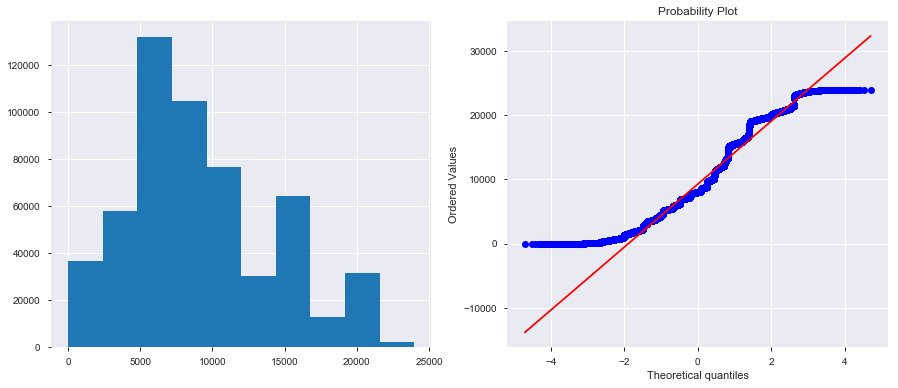

In [165]:
dignostic_plots(train_final,'Purchase')

In [166]:
shapiro_test = stats.shapiro(train_final.Purchase)
print(shapiro_test)  # p-value is low because of the relatively large sample size. When the sample size is large, a test is likely to report significant differences from the normal distribution even for small deviations from normal.It is better to use visual methods. That is, plots.

(0.9526435732841492, 0.0)


####  log Transformation

In [167]:
train_final['log_Purchase']=np.log(train_final['Purchase']+1)

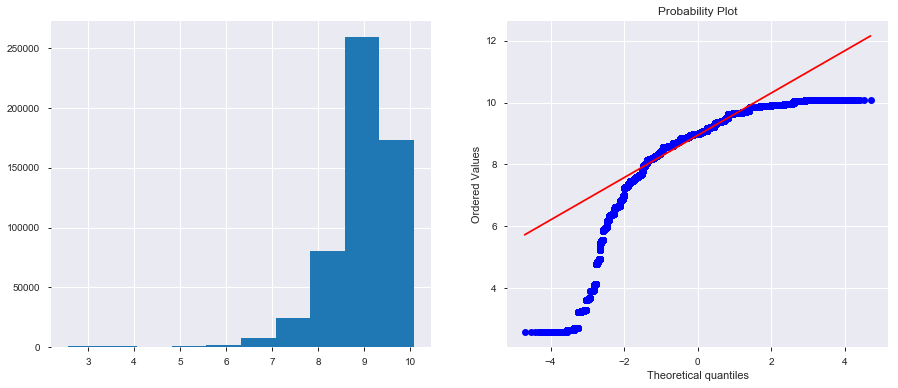

In [168]:
dignostic_plots(train_final,'log_Purchase')

### Recipocal Transformation

In [169]:
train_final['Reci_Purchase']=1/(train_final['Purchase']+1) 

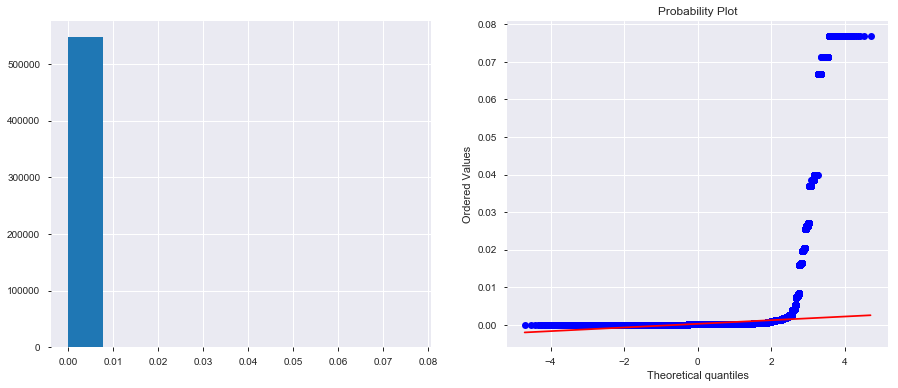

In [170]:
dignostic_plots(train_final,'Reci_Purchase')

### Square root transformation

In [171]:
train_final['sqrt_Purchase']=np.sqrt(train_final['Purchase']) 

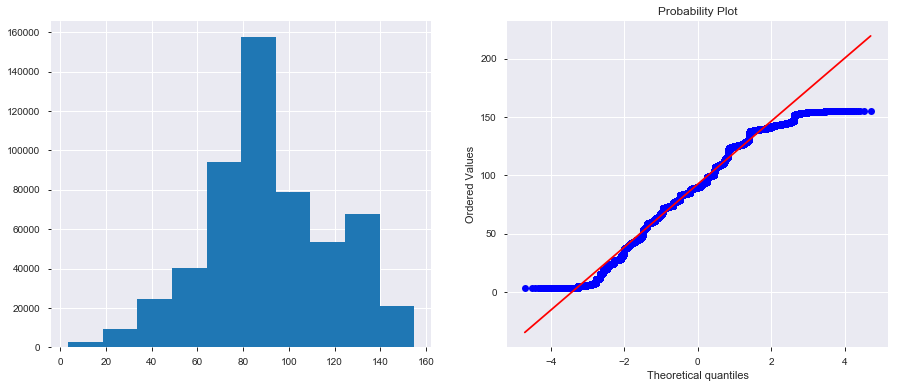

In [172]:
dignostic_plots(train_final,'sqrt_Purchase')  # looks good

### Exponantial Transformation

In [173]:
train_final['exp_Purchase']=train_final['Purchase']**(1/5)

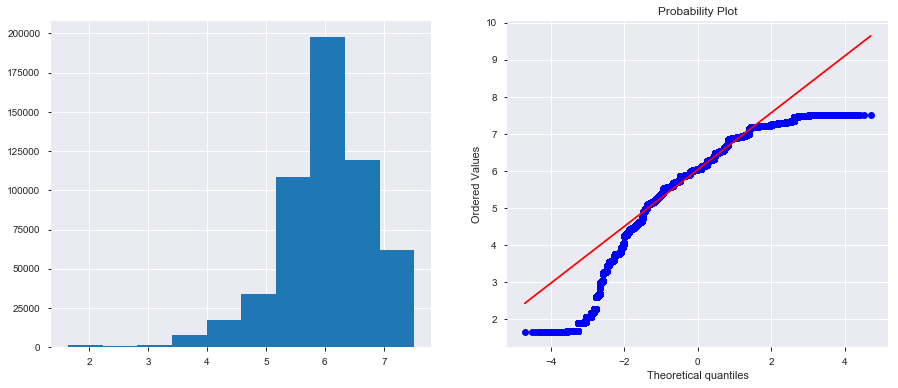

In [174]:
dignostic_plots(train_final,'exp_Purchase') 

### Box Cox Transformation

In [175]:
train_final['Box_Cox_Purchase'],param=stats.boxcox(train_final['Purchase']+1)
print('Optimal lambada :' ,param)

Optimal lambada : 0.5564112990213447


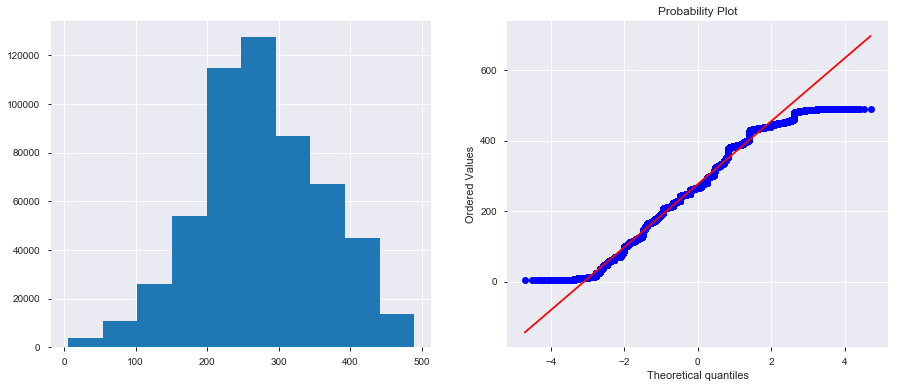

In [176]:
dignostic_plots(train_final,'Box_Cox_Purchase') 

### Ither we can go with sqrt or box_cox transformation (since we got optimal parameter as 0.55 both will same). Since box_cox look more normal than sqrt we will go with the box_cox transformation

In [177]:
train_final.columns

Index(['Purchase', 'User_ID', 'Age', 'Gender', 'Marital_Status', 'Product_ID',
       'Stay_In_Current_City_Years', 'City_Category_B', 'City_Category_C',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Produc

In [178]:
train_final=train_final.drop(['User_ID','Product_ID','log_Purchase','Reci_Purchase','sqrt_Purchase','exp_Purchase','Purchase'],axis=1)

In [179]:
#train_final=train_final.drop(['User_ID','Product_ID'],axis=1)

In [180]:
train_final.columns

Index(['Age', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
       'City_Category_B', 'City_Category_C', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1

In [181]:
train_final.shape

(550068, 46)

## Checking For Linearity 

In [182]:
correlation_matrix=train_final.corr()

In [183]:
#correlation_matrix.to_excel('correlation_matrix.xlsx')

###### Chaking for Relationships

In [184]:
def linear_relationship(x):
    coeff=np.corrcoef(train_final.Box_Cox_Purchase,x)[1][0]
    log_coeff=np.corrcoef(train_final.Box_Cox_Purchase,np.log(x+1))[1][0] #x+1 to avoid divide by zero encountered in log
    exp_coeff=np.corrcoef(train_final.Box_Cox_Purchase,np.exp(x))[1][0]
    sqrt_coeff=np.corrcoef(train_final.Box_Cox_Purchase,np.sqrt(x))[1][0]
    squre_coeff=np.corrcoef(train_final.Box_Cox_Purchase,x**2)[1][0]
    return pd.Series(data=[coeff,log_coeff,exp_coeff,sqrt_coeff,squre_coeff],
                     index=['coeff','log_coeff','exp_coeff','sqrt_coeff','squre_coeff'])

In [185]:
linear_reln_summary=train_final.apply(linear_relationship).T

In [186]:
#linear_reln_summary.to_excel('linear_Reln.xlsx') #Not dropping variable at this stage since most of var are categorical

## Features Selection

In [187]:
train_final.columns=[feature.replace("-","") for feature in train_final.columns] # Any - in string wiill cosider by model as minus 

In [188]:
train_final.columns

Index(['Age', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
       'City_Category_B', 'City_Category_C', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
train_train ,test_train = train_test_split(train_final,test_size=0.2,random_state = 123 ) #just to check how model is working classifying train test again into train test

In [191]:
train_train.head()

,Age,Gender,Marital_Status,Stay_In_Current_City_Years,City_Category_B,City_Category_C,Occupation_1,Occupation_2,Occupation_3,Occupation_4,...,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Box_Cox_Purchase
391094,3,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,431.371748
244559,2,1,0,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,165.991108
192190,7,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,159.355917
323112,4,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,276.856322
169758,2,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,227.902567


In [192]:
x_fatures=[i for i in train_train.columns.difference(['Box_Cox_Purchase'])]

In [193]:
x_formula="+".join(x_fatures)

In [194]:
x_formula

'Age+City_Category_B+City_Category_C+Gender+Marital_Status+Occupation_1+Occupation_10+Occupation_11+Occupation_12+Occupation_13+Occupation_14+Occupation_15+Occupation_16+Occupation_17+Occupation_18+Occupation_19+Occupation_2+Occupation_20+Occupation_3+Occupation_4+Occupation_5+Occupation_6+Occupation_7+Occupation_8+Occupation_9+Product_Category_1_10+Product_Category_1_11+Product_Category_1_12+Product_Category_1_13+Product_Category_1_14+Product_Category_1_15+Product_Category_1_16+Product_Category_1_17+Product_Category_1_18+Product_Category_1_19+Product_Category_1_2+Product_Category_1_20+Product_Category_1_3+Product_Category_1_4+Product_Category_1_5+Product_Category_1_6+Product_Category_1_7+Product_Category_1_8+Product_Category_1_9+Stay_In_Current_City_Years'

#### variance inflation factor(VIF)
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

In [195]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [196]:
%%capture
y,X=dmatrices('Box_Cox_Purchase~Age+City_Category_B+City_Category_C+Gender+Marital_Status+Occupation_1+Occupation_10+Occupation_11+Occupation_12+Occupation_13+Occupation_14+Occupation_15+Occupation_16+Occupation_17+Occupation_18+Occupation_19+Occupation_2+Occupation_20+Occupation_3+Occupation_4+Occupation_5+Occupation_6+Occupation_7+Occupation_8+Occupation_9+Product_Category_1_10+Product_Category_1_11+Product_Category_1_12+Product_Category_1_13+Product_Category_1_14+Product_Category_1_15+Product_Category_1_16+Product_Category_1_17+Product_Category_1_18+Product_Category_1_19+Product_Category_1_2+Product_Category_1_20+Product_Category_1_3+Product_Category_1_4+Product_Category_1_5+Product_Category_1_6+Product_Category_1_7+Product_Category_1_8+Product_Category_1_9+Stay_In_Current_City_Years',train_train, return_type='dataframe')

In [197]:
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [198]:
vif.round(1).sort_values(by='VIF',ascending=False) #rm var with VIF >5 #all var vif is less than 2

,VIF,features
0,27.6,Intercept
20,1.9,Occupation_4
23,1.7,Occupation_7
3,1.6,City_Category_C
6,1.6,Occupation_1
40,1.5,Product_Category_1_5
43,1.5,Product_Category_1_8
1,1.5,Age
14,1.5,Occupation_17
2,1.5,City_Category_B


In [199]:
import statsmodels.formula.api as smf

In [200]:
lm=smf.ols('Box_Cox_Purchase~Age+City_Category_B+City_Category_C+Gender+Marital_Status+Occupation_10+Occupation_11+Occupation_12+Occupation_13+Occupation_14+Occupation_15+Occupation_16+Occupation_17+Occupation_19+Occupation_2+Occupation_20+Occupation_3+Occupation_4+Occupation_5+Occupation_6+Occupation_7+Occupation_8+Occupation_9+Product_Category_1_10+Product_Category_1_11+Product_Category_1_12+Product_Category_1_13+Product_Category_1_14+Product_Category_1_15+Product_Category_1_16+Product_Category_1_17+Product_Category_1_18+Product_Category_1_19+Product_Category_1_2+Product_Category_1_20+Product_Category_1_3+Product_Category_1_4+Product_Category_1_5+Product_Category_1_6+Product_Category_1_7+Product_Category_1_8+Product_Category_1_9',train_train)

In [201]:
lm=lm.fit()

In [202]:
print(lm.summary()) #rm high P value var Occupation_18, Stay_In_Current_City_Years,Occupation_1

                            OLS Regression Results                            
Dep. Variable:       Box_Cox_Purchase   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                 2.035e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:36:04   Log-Likelihood:            -2.3668e+06
No. Observations:              440054   AIC:                         4.734e+06
Df Residuals:                  440011   BIC:                         4.734e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               340.24

In [203]:
train_train['y_pred_train'] = lm.predict(train_train)

In [204]:
from sklearn import metrics

In [205]:
print('MAE:', metrics.mean_absolute_error(train_train.Box_Cox_Purchase   , train_train.y_pred_train))
print('MSE:', metrics.mean_squared_error(train_train.Box_Cox_Purchase  , train_train.y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_train.Box_Cox_Purchase   , train_train.y_pred_train)))

MAE: 40.60067069181207
MSE: 2749.1940021761015
RMSE: 52.432756957612874


In [206]:
test_train['y_pred_test'] = lm.predict(test_train)

In [207]:
print('MAE:', metrics.mean_absolute_error(test_train.Box_Cox_Purchase   , test_train.y_pred_test))
print('MSE:', metrics.mean_squared_error(test_train.Box_Cox_Purchase  , test_train.y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_train.Box_Cox_Purchase   , test_train.y_pred_test)))

MAE: 40.59707230944355
MSE: 2749.66928462583
RMSE: 52.4372890663298


In [208]:
test_final.columns

Index(['Purchase', 'User_ID', 'Age', 'Gender', 'Marital_Status', 'Product_ID',
       'Stay_In_Current_City_Years', 'City_Category_B', 'City_Category_C',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Produc

In [211]:
id=test_final[['User_ID','Product_ID']]

In [212]:
test_final=test_final.drop(['Purchase', 'User_ID','Product_ID'],axis=1)

In [213]:
test_final['y_pred_test'] = lm.predict(test_final)

In [220]:
output=pd.concat([test_final[['y_pred_test']],id[[ 'User_ID','Product_ID']]],axis=1)

In [224]:
from scipy.special import boxcox, inv_boxcox

In [223]:
output['Purchase']=inv_boxcox(output['y_pred_test'],0.5564112990213447) #reverse trasformation

In [226]:
output=output[['Purchase','User_ID','Product_ID']]

In [228]:
output.to_csv('output.csv')

(array([1.24000e+02, 3.90400e+03, 7.14600e+03, 1.18990e+04, 3.14930e+04,
        4.53790e+04, 1.10876e+05, 1.49429e+05, 6.21440e+04, 1.76600e+04]),
 array([-239.32853669, -203.88704744, -168.44555819, -133.00406894,
         -97.5625797 ,  -62.12109045,  -26.6796012 ,    8.76188804,
          44.20337729,   79.64486654,  115.08635579]),
 <a list of 10 Patch objects>)

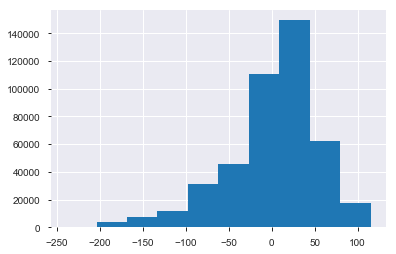

In [217]:
plt.hist(lm.resid)